<a href="https://colab.research.google.com/github/Jenn-mawia/Prediction-of-house-prices-using-several-regression-techniques/blob/master/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Study on Hass Consulting Company house prices**

# Defining the question

>As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience.

>You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 

>Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# Specifying the question

>While performing your regression analysis, perform modeling using the following given regression techniques then evaluate their performance:
 - Multiple Linear Regression
 - Quantile Regression
 - Ridge Regression
 - Lasso Regression
 - Elastic Net Regression

>Also provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 



# Defining the metrics for success

>This project will be considered a success if:
- the factors that affect house prices are studied and the most contributing factors are determined.
- the best model to predict the sale of prices is determined and recommended thereof.




# Understanding the context

>Whenever we want to move out of a house and into a new one/want to buy a house, we tend to look at several features of the specific house. These include: number of bedrooms, number of floors, the squarefeet of the house, the location of the house etc.

>Therefore, a firsthand knowledge of how these features affect the price of a house is required before purchase or sale of a house. 

# Experimental Design

The following is the order in which I went about this project:

- Data sourcing & understanding
- Checking the data (shape, number of records, datatypes)
- Data cleaning procedures (handling null values,outliers, anomalies)
- Exploratory data analysis (Univariate, Bivariate, Multivariate analyses)
- Implementing the solution
  - Multiple Linear Regression
    - Residuals & heteroskedasticity test
- Challenging the solution
  - Quantile Regression
  - Ridge Regression
  - Lasso Regression
  - Elasti-Net Regression
-Follow up questions

# Importing Libraries

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import statsmodels.regression.quantile_regression as Q_reg
from sklearn import preprocessing
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Reading the data

In [2]:
houses = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

# Checking the data

In [3]:
# number of instances and variables in the data
houses.shape

# there are 21613 rows and 20 columns

(21613, 20)

In [4]:
# preview the top of the dataset
houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# preview the bottom of the dataset
houses.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# check datatypes of each column
houses.dtypes

# The data in all columns is numeric with types integer and float

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Data Relevance / Appropriateness to the question

The data available for this project is relevant to the needs of predicting the price of a house. The data comprises a dataset which can be downloaded on this [link](http://bit.ly/IndependentProjectWeek7Dataset).The data contains features such as the size of the living area, number of bedrooms, number of bathrooms, year built which all influence the price of a house. 

These fields are appropriate and will influence the outcome of the project

# Data Cleaning

## Missing values

In [7]:
# check for missing data
houses.isnull().sum()

# there is no missing data in any of the columns

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Outliers

In [8]:
houses.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

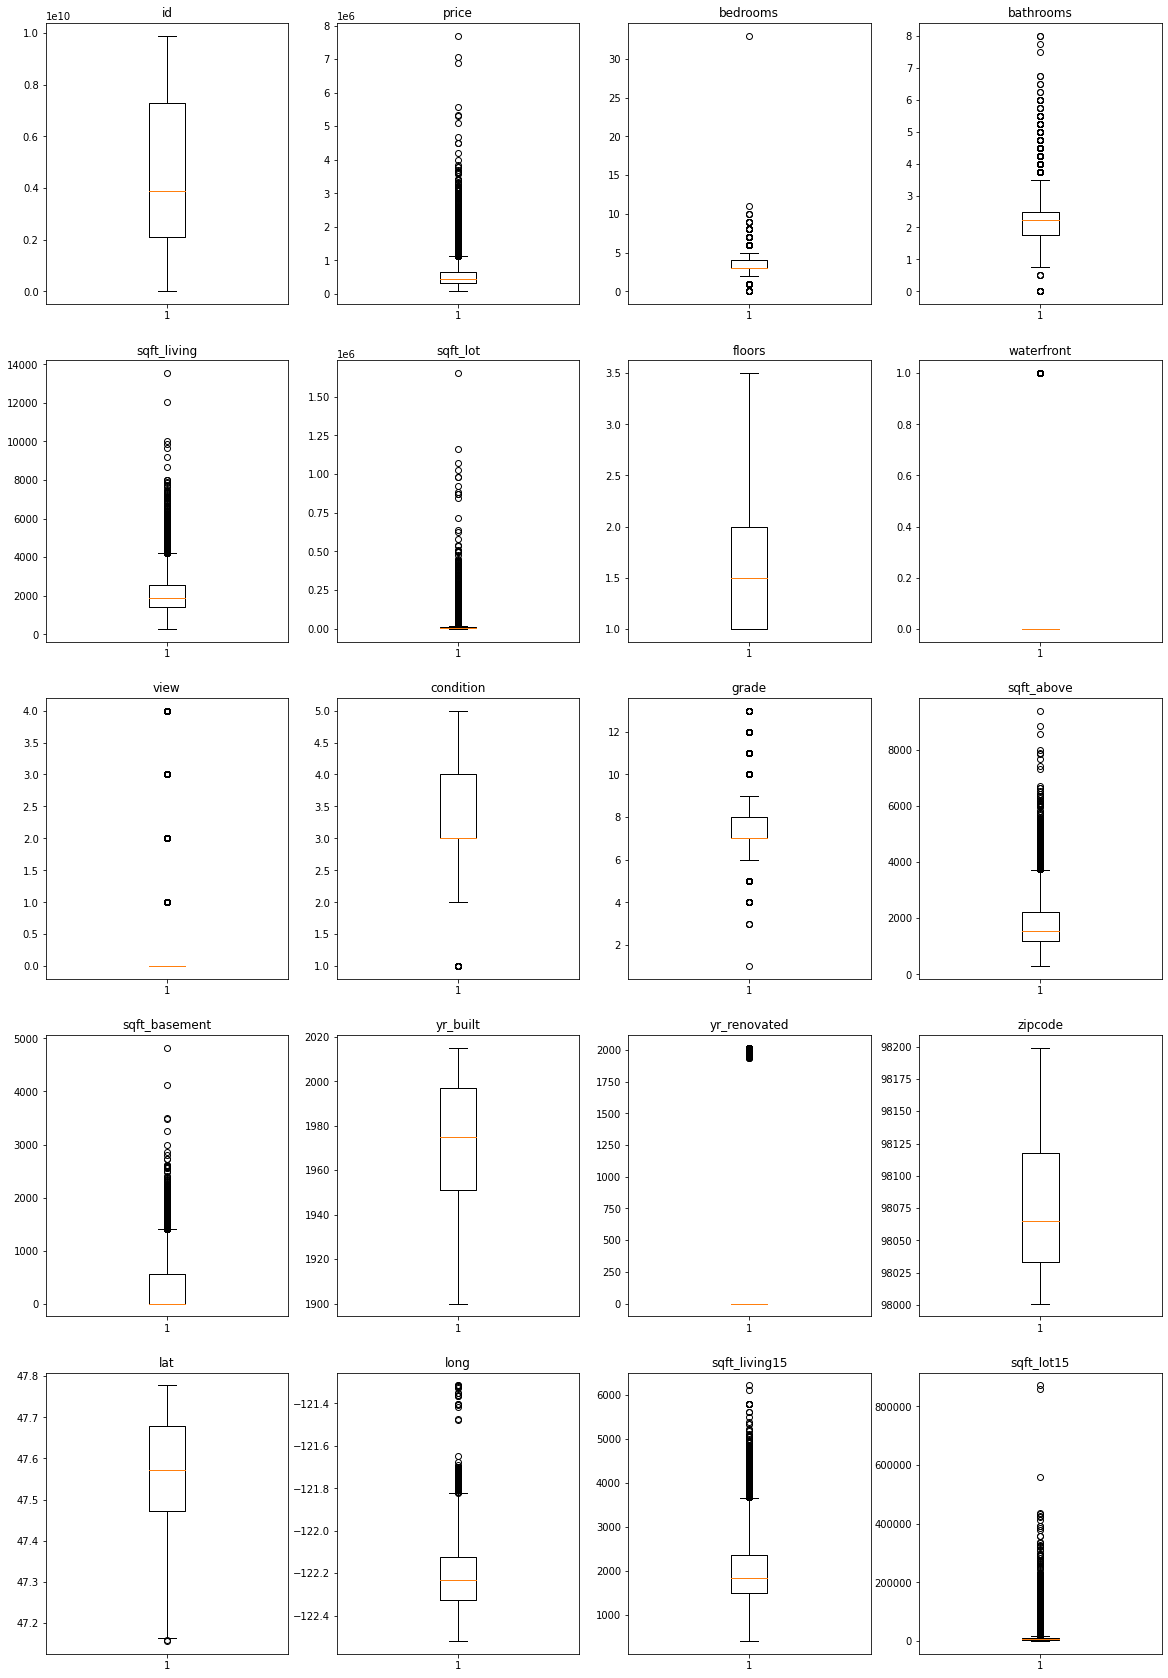

In [9]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'id': 1, 'price':2, 'bedrooms':3, 'bathrooms':4, 'sqft_living':5, 'sqft_lot':6,
       'floors':7, 'waterfront':8, 'view':9, 'condition':10, 'grade':11, 'sqft_above':12,
       'sqft_basement':13, 'yr_built':14, 'yr_renovated':15, 'zipcode':16, 'lat':17, 'long':18,
       'sqft_living15':19, 'sqft_lot15':20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(houses[variable])
  plt.title(variable)

plt.show()

In [10]:
# dealing with outliers

print(f"Size of dataset with outliers: {houses.shape}")
# dealing with outliers
Q1 = houses.quantile(0.25)
Q3 = houses.quantile(0.75)
IQR = Q3 - Q1
data = houses[~((houses < (Q1 - 1.5 * IQR)) | (houses > (Q3 + 1.5 * IQR))).any(axis=1)]

print("...................")

print(f"Size of dataset after removal of outliers: {data.shape}")

Size of dataset with outliers: (21613, 20)
...................
Size of dataset after removal of outliers: (14931, 20)


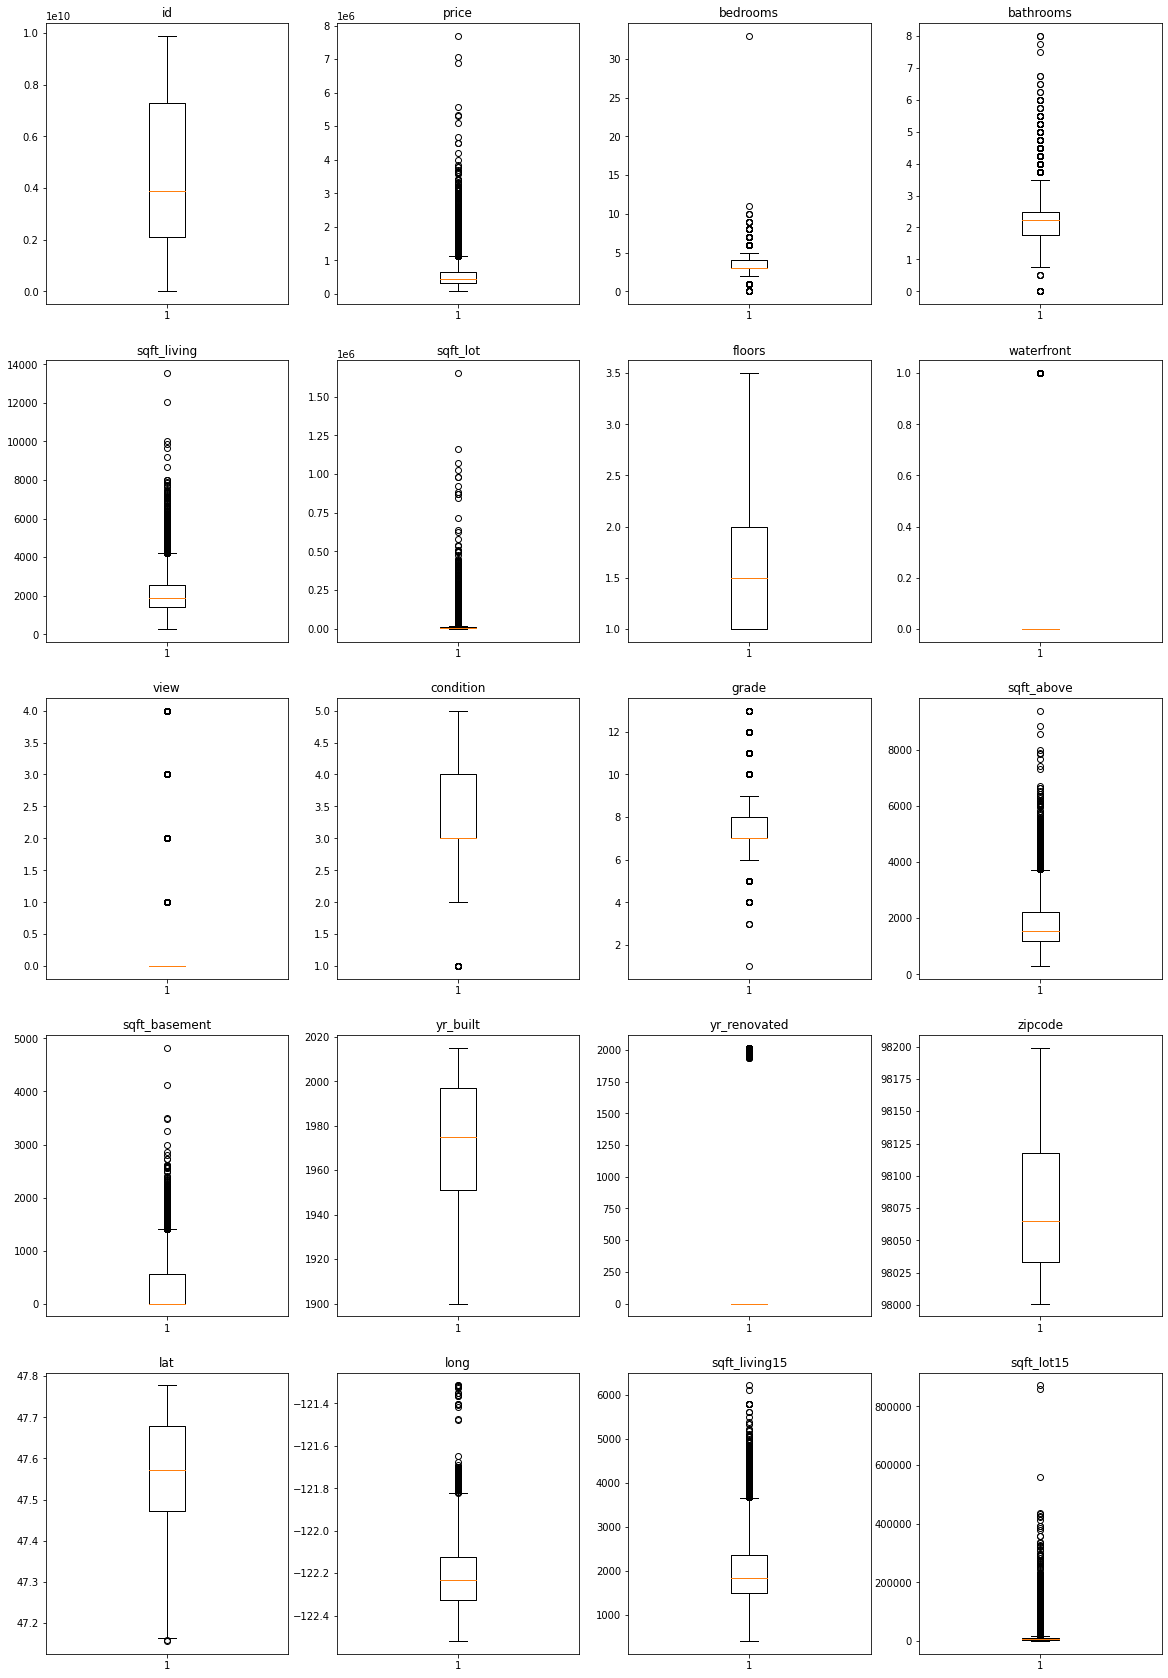

In [11]:
# plot to see changes after removal of outliers
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(houses[variable])
  plt.title(variable)

plt.show()

>From the plots, not all outliers are removed. This is due to some data falling in percentiles that are so far away from the normal 0.25, 0.5 ad 0.75 percentiles such as the 80th, 90th, 99th and so on. We will work with them as it will be possile to perform quantile regression on these percentiles.

## Anomalies

In [12]:
# checking for anomalies
# calculate the interquartile range using pandas
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# calculate the interquartile range using numpy
iqr1 = np.quantile(data['price'], .25)
iqr3 = np.quantile(data['price'], .75)
IQR2 = iqr3 - iqr1

# compare the two values
print(IQR, IQR2)

247000.0 247000.0


# Exploratory Data Analysis(EDA)

## Univariate Analysis

**Histogram plots for the columns**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


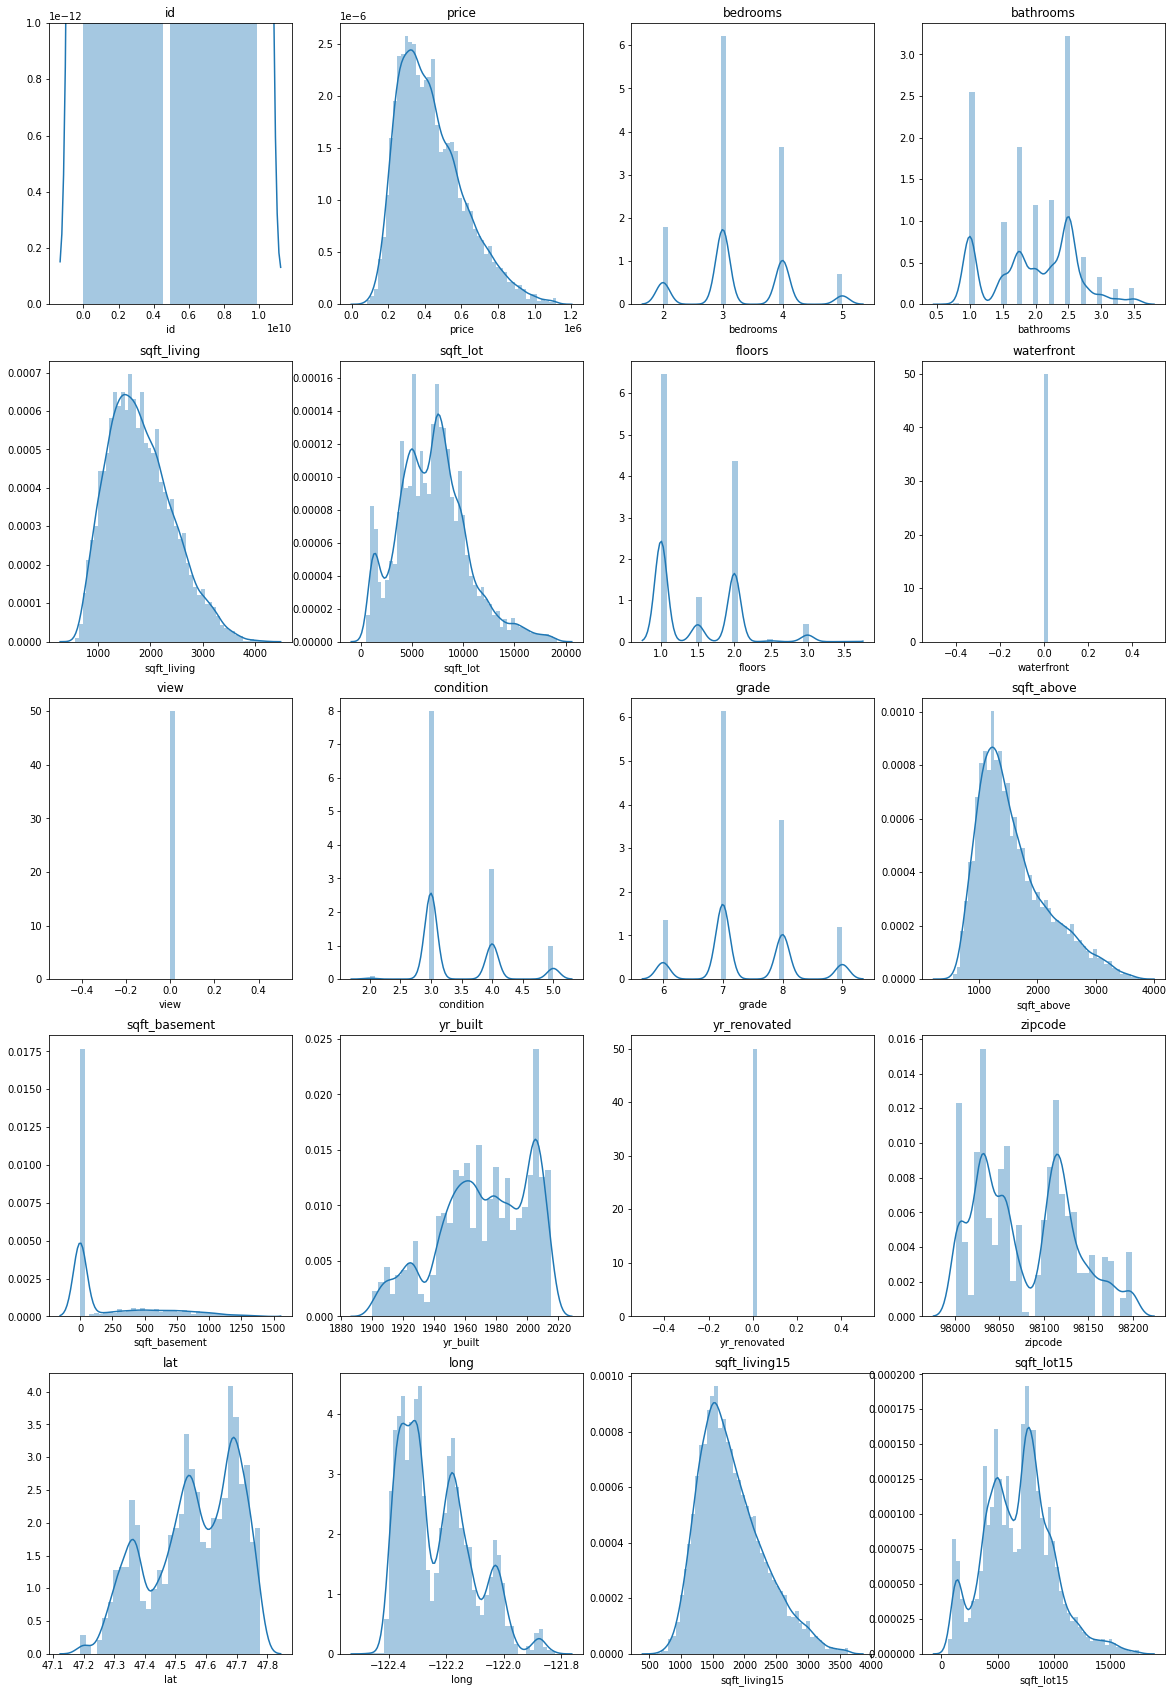

In [13]:
# plot histograms for all numeric columns
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(data[variable])
  plt.title(variable)

plt.show()

**Measures of central tendency**

In [14]:
# compute the mean for each of the variables
data.mean()

id               4.729239e+09
price            4.383980e+05
bedrooms         3.261938e+00
bathrooms        1.972105e+00
sqft_living      1.814005e+03
sqft_lot         6.988594e+03
floors           1.471268e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.420267e+00
grade            7.380082e+00
sqft_above       1.585053e+03
sqft_basement    2.289518e+02
yr_built         1.971722e+03
yr_renovated     0.000000e+00
zipcode          9.807976e+04
lat              4.755887e+01
long            -1.222301e+02
sqft_living15    1.796651e+03
sqft_lot15       6.868036e+03
dtype: float64

In [15]:
# compute the median points for each of the variables
data.median()

id               4.037800e+09
price            4.050000e+05
bedrooms         3.000000e+00
bathrooms        2.000000e+00
sqft_living      1.740000e+03
sqft_lot         7.020000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.430000e+03
sqft_basement    0.000000e+00
yr_built         1.974000e+03
yr_renovated     0.000000e+00
zipcode          9.807200e+04
lat              4.756970e+01
long            -1.222640e+02
sqft_living15    1.710000e+03
sqft_lot15       7.172000e+03
dtype: float64

In [16]:
# compute the mode for each variable except 'id'
# 'id' has a lot of unique values which appear several times
mode = data.drop(['id'], 1)
mode.mode()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,350000.0,3.0,2.5,1400.0,5000.0,1.0,0.0,0.0,3.0,7.0,1010.0,0.0,2014.0,0.0,98103.0,47.6904,-122.3,1540.0,5000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6955,NaN,NaN,NaN


**Measures of dispersion**

In [17]:
# find the standard deviations, quantiles, min and max values

# summary statistics of the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.493100e+04,1.493100e+04,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.0,14931.0,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.0,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000
mean,4.729239e+09,4.383980e+05,3.261938,1.972105,1814.005090,6988.593798,1.471268,0.0,0.0,3.420267,7.380082,1585.053312,228.951778,1971.721854,0.0,98079.756949,47.558871,-122.230141,1796.650660,6868.036300
std,2.851684e+09,1.800721e+05,0.772803,0.646070,614.579034,3355.886692,0.547917,0.0,0.0,0.647103,0.804876,601.412165,353.231478,29.247428,0.0,53.482436,0.142099,0.123703,507.192667,2987.930774
min,2.800031e+06,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,0.0,98001.000000,47.189500,-122.472000,620.000000,651.000000
25%,2.321300e+09,3.000000e+05,3.000000,1.500000,1350.000000,4690.000000,1.000000,0.0,0.0,3.000000,7.000000,1140.000000,0.000000,1952.000000,0.0,98033.000000,47.457550,-122.333000,1430.000000,4800.000000
50%,4.037800e+09,4.050000e+05,3.000000,2.000000,1740.000000,7020.000000,1.000000,0.0,0.0,3.000000,7.000000,1430.000000,0.000000,1974.000000,0.0,98072.000000,47.569700,-122.264000,1710.000000,7172.000000
75%,7.454000e+09,5.470000e+05,4.000000,2.500000,2210.000000,8925.000000,2.000000,0.0,0.0,4.000000,8.000000,1910.000000,450.000000,1999.000000,0.0,98118.000000,47.683500,-122.152500,2090.000000,8649.500000
max,9.900000e+09,1.120000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,0.0,0.0,5.000000,9.000000,3740.000000,1400.000000,2015.000000,0.0,98199.000000,47.777600,-121.821000,3640.000000,17550.000000


In [18]:
# compute the variance for each variable
var = data.var()
var1 = pd.DataFrame()
var1['variance'] = var
var1.sort_values(by='variance', ascending=False)
# the price of a house and the square feet of the house have a higher variance compared to the other fields

,variance
id,8.132101e+18
price,3.242597e+10
sqft_lot,1.126198e+07
sqft_lot15,8.927730e+06
sqft_living,3.777074e+05
sqft_above,3.616966e+05
sqft_living15,2.572444e+05
sqft_basement,1.247725e+05
zipcode,2.860371e+03
yr_built,8.554120e+02


In [19]:
# compute the skewness for each variable
data.skew()

# latitude of the house, year built and number of bathrooms appear to be negatively skewed while the other variables are positively skewed.

id               0.186640
price            0.831037
bedrooms         0.243242
bathrooms       -0.093370
sqft_living      0.549055
sqft_lot         0.529096
floors           0.772930
waterfront       0.000000
view             0.000000
condition        1.118997
grade            0.318444
sqft_above       0.965497
sqft_basement    1.323470
yr_built        -0.450494
yr_renovated     0.000000
zipcode          0.321090
lat             -0.441816
long             0.683607
sqft_living15    0.750531
sqft_lot15       0.297637
dtype: float64

In [20]:
data.kurt()

id              -1.275501
price            0.402527
bedrooms        -0.272070
bathrooms       -0.816832
sqft_living     -0.092692
sqft_lot         0.489809
floors          -0.218548
waterfront       0.000000
view             0.000000
condition        0.313577
grade           -0.339131
sqft_above       0.410133
sqft_basement    0.503191
yr_built        -0.652744
yr_renovated     0.000000
zipcode         -0.954476
lat             -0.852112
long            -0.264446
sqft_living15    0.295330
sqft_lot15       0.188086
dtype: float64

## Bivariate Analysis

>Since the aim is to look at the factors affecting the price of a house, I will make a plot of all variables against the price of a house, to investigate these relationships.

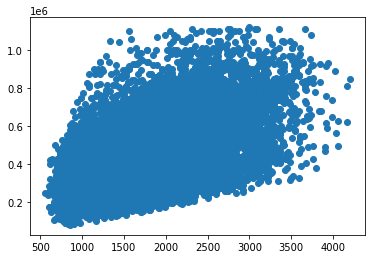

In [21]:
# make a plot of the relationship between price and sqft of the living area
plt.scatter(data['sqft_living'], data['price'], marker='o')

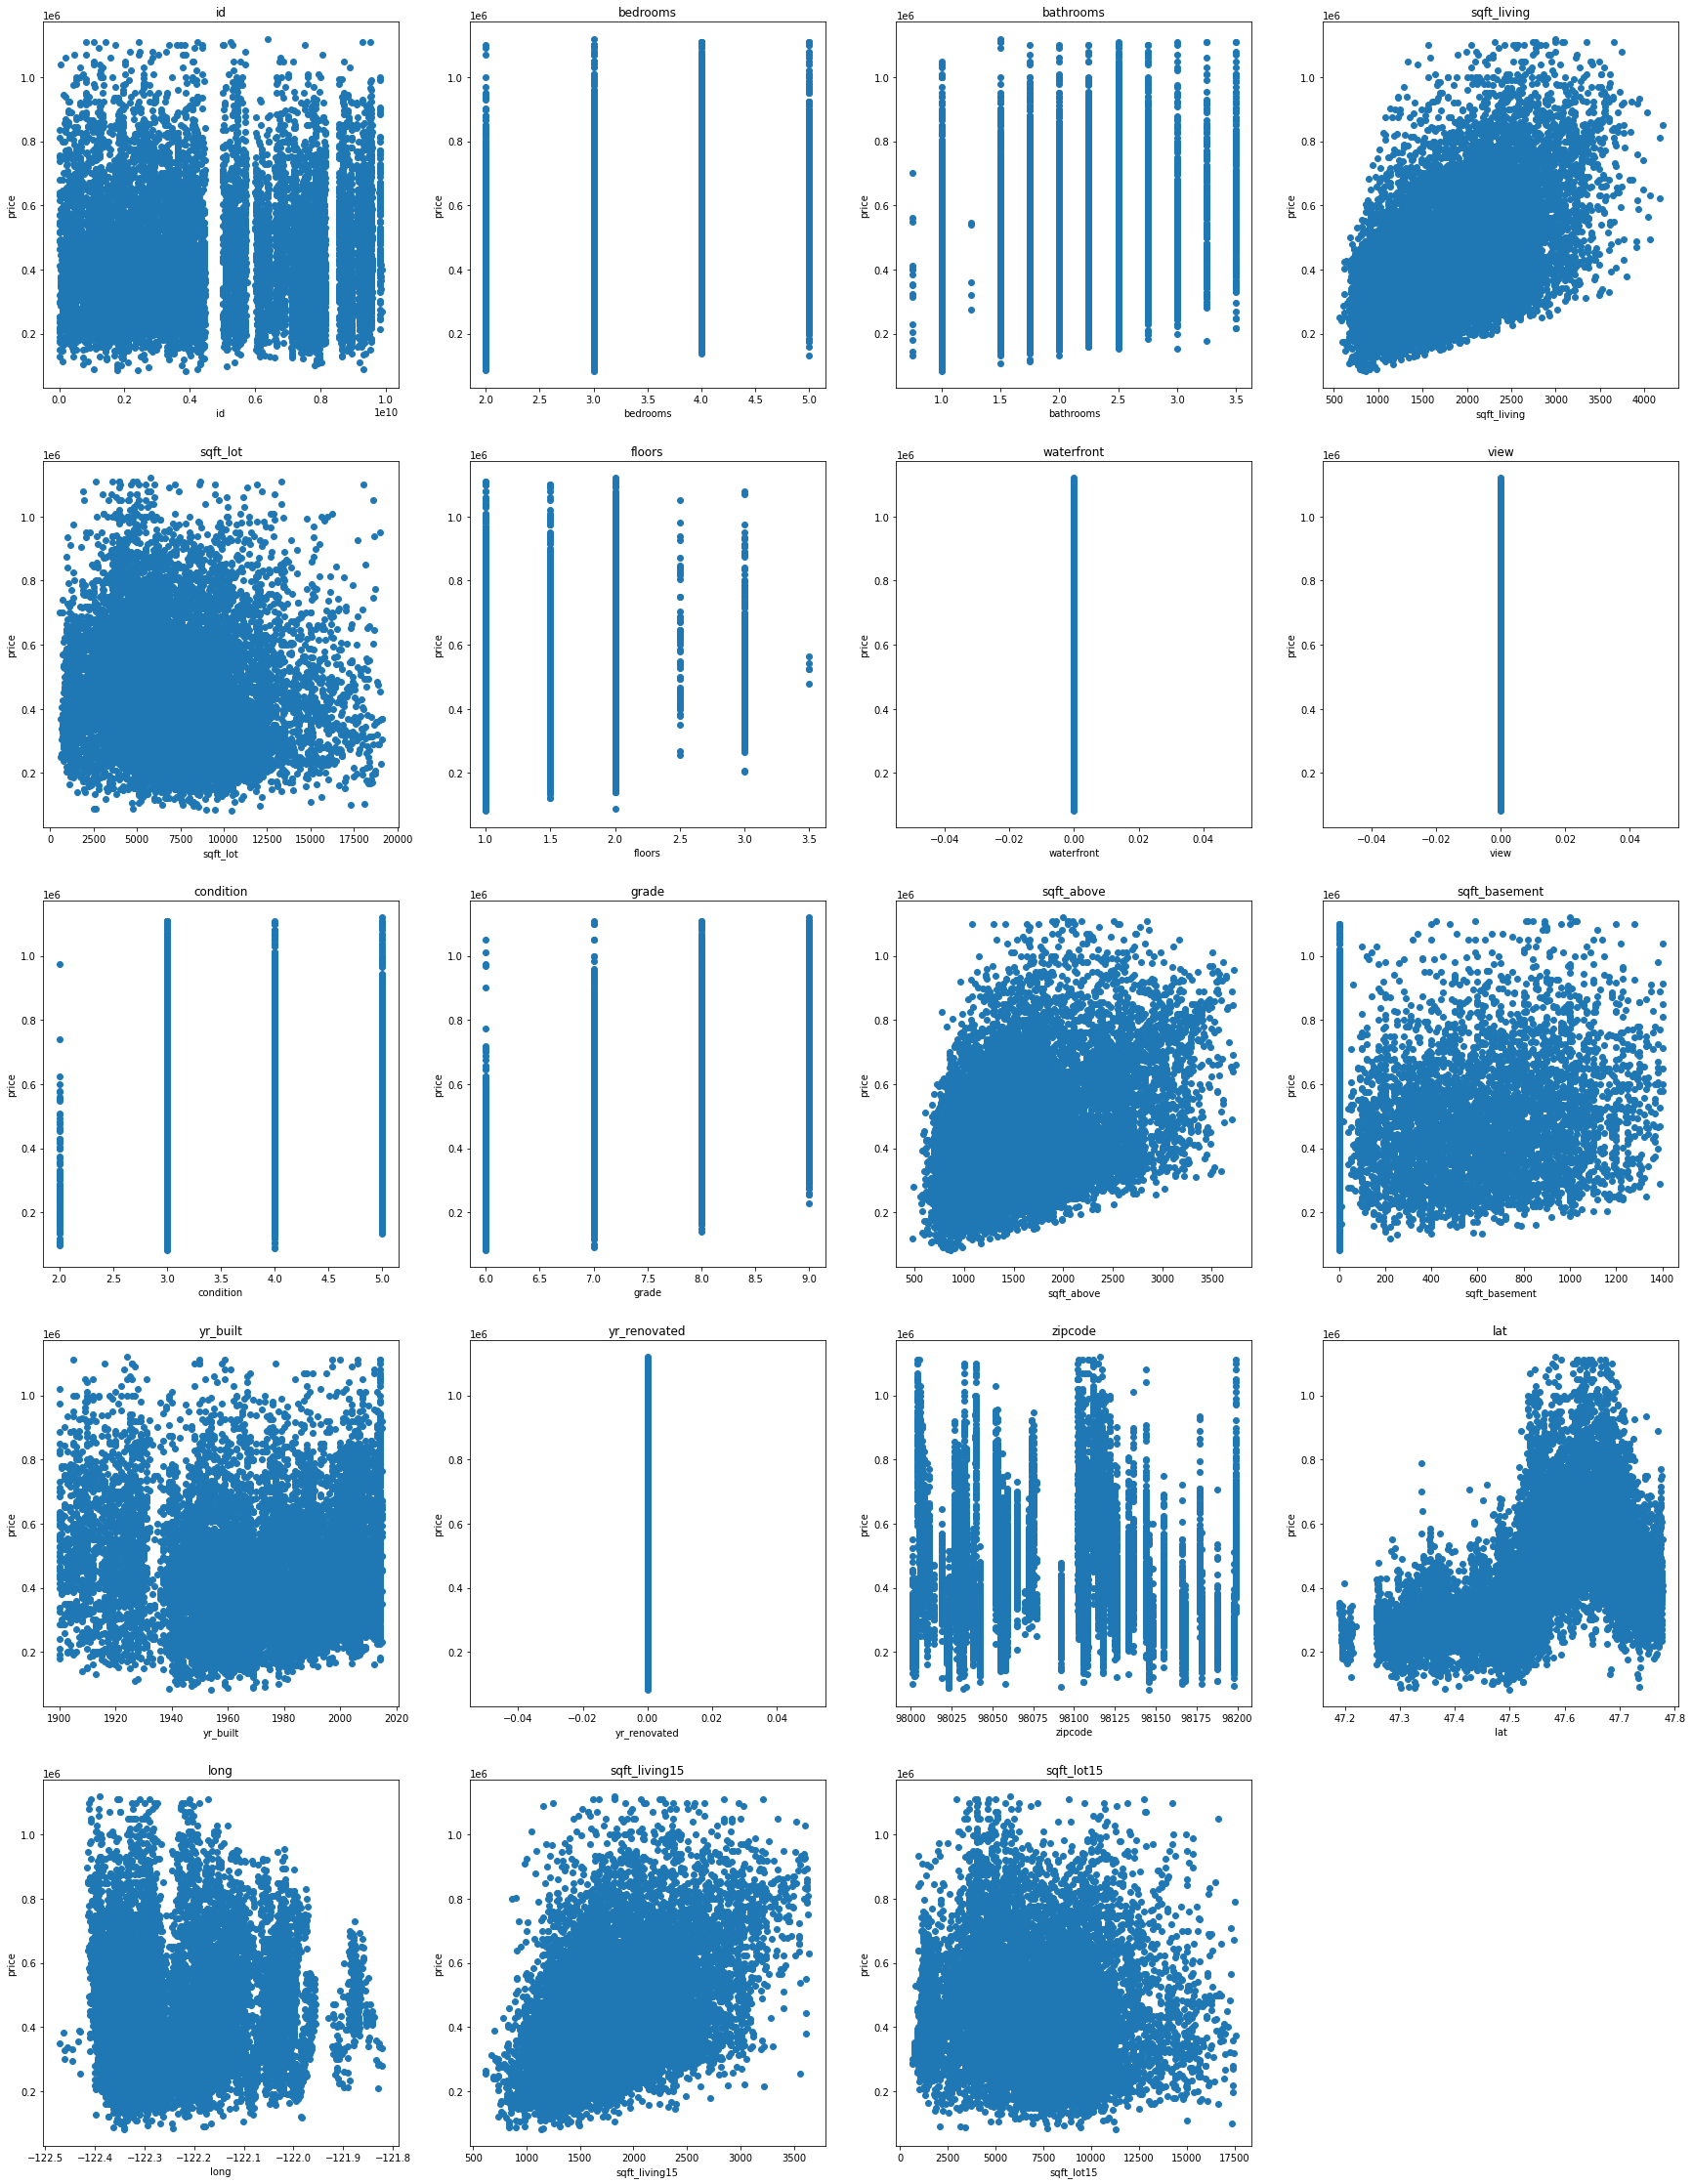

In [22]:
# save the column names onto a dictionary
columns_dict2 = {'id': 1, 'bedrooms':2, 'bathrooms':3, 'sqft_living':4, 'sqft_lot':5,
       'floors':6, 'waterfront':7, 'view':8, 'condition':9, 'grade':10, 'sqft_above':11,
       'sqft_basement':12, 'yr_built':13, 'yr_renovated':14, 'zipcode':15, 'lat':16, 'long':17,
       'sqft_living15':18, 'sqft_lot15':19}


plt.figure(figsize=(30,40))
# make a boxplot for each numerical column
for variable,i in columns_dict2.items():
  plt.subplot(5,4,i)
  x = data[variable]
  y = data['price']
  plt.scatter(x, y, marker='o')
  # plt.boxplot(houses[variable])
  plt.title(variable)
  plt.xlabel(variable)
  plt.ylabel('price')

>Some plots already exhibit heteroscedasticity

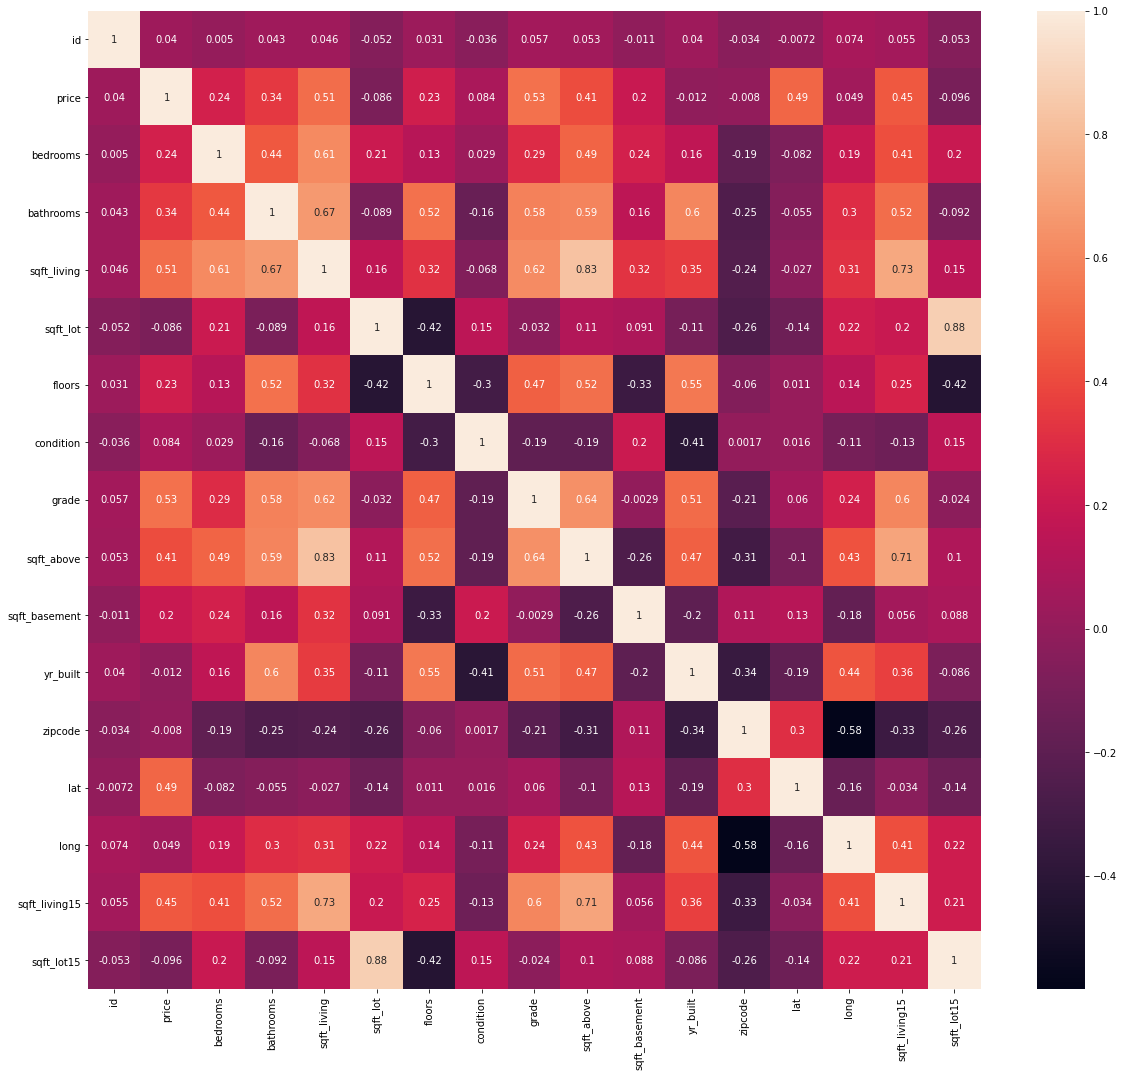

In [23]:
# plot the correlation matrix on a heatmap for easy interpretability
plt.figure(figsize = (20,18))
# sns.heatmap(data.corr(), annot=True)

# I will remove the following columns because they have less data and do not exhibit correlation with other variables

needed = data.drop(['waterfront', 'view', 'yr_renovated'], 1)
sns.heatmap(needed.corr(), annot=True)

>The fields: sqft_living, grade have a high correlation with price. 

>The fields: sqft_above, latitude, sqft_living15 have a slight correlation with the price of a house.



## Multivariate Analysis

>I will perform factor analysis to investigate which factors have a huge effect in determining the price of a house. 

>I will drop the target variable and also those that have little to no information from the dataset.

In [24]:
factor = data.drop(['price', 'waterfront', 'view', 'yr_renovated'], 1)
factor.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
2,5631500400,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503
6,1321400060,3,2.25,1715,6819,2.0,3,7,1715,0,1995,98003,47.3097,-122.327,2238,6819


In [25]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(factor)
chi_square_value, p_value


/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

>The output from calculating the bartlett's sphericity gives nan values instead of a matrix. This is because there are no variances, as all the groups contain equal values. 

>**nan** sort of serves as an error message indicating the variances are 0(which can be seen from the univariate analysis performed above where most variables have a variance very close to 0).

**Check which features are more important**

>Using the sklearn.feature selection module, the mutual_info_classif will give the most important features which affect the price of a house

In [26]:
# select features and labels
X = data.drop("price", 1).values  #features
y = data['price'].values #labels

# import library to scale the features
from sklearn.preprocessing import StandardScaler
X =   StandardScaler().fit_transform(X)

In [27]:
features_ = data.drop('price', 1)
features_.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


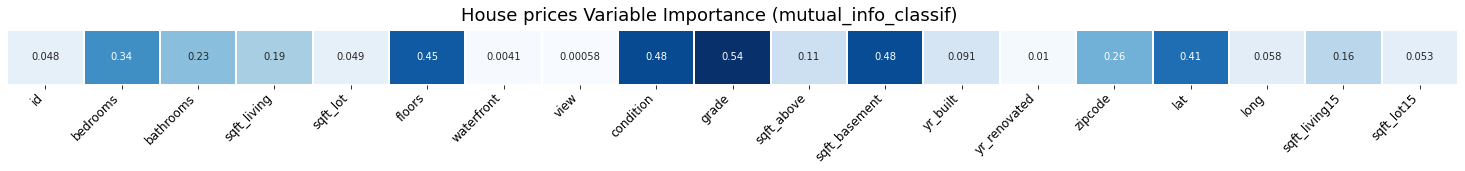

In [28]:
# import feature_selection module
from sklearn.feature_selection import mutual_info_classif
price_mutual_information = mutual_info_classif(X, y)

#  plot a heatmap to see the differences clearly
plt.subplots(1, figsize=(26, 1))
sns.heatmap(price_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(features_.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("House prices Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

>The number of bedrooms, number of floors, the condition of a house, the grade of a house, the square feet of the basement of a house, the latitude position of a house have a huge contribution to determining the price of a house.

>The number of bathrooms and zipcode of a house also have a slight importance to the price of a house. A house having a zipcode of a city tends to be more expensive than one in the country side.


# Implementing the solution

## Regression Analysis

### Multivariate Linear regression

**Check for multicolinearity**

>Linear regression assumes there is no multicolinearity between independent variables, otherwise the model performance will be poor. Therefore, a check for multicoliearity should be done on the independent variables. 

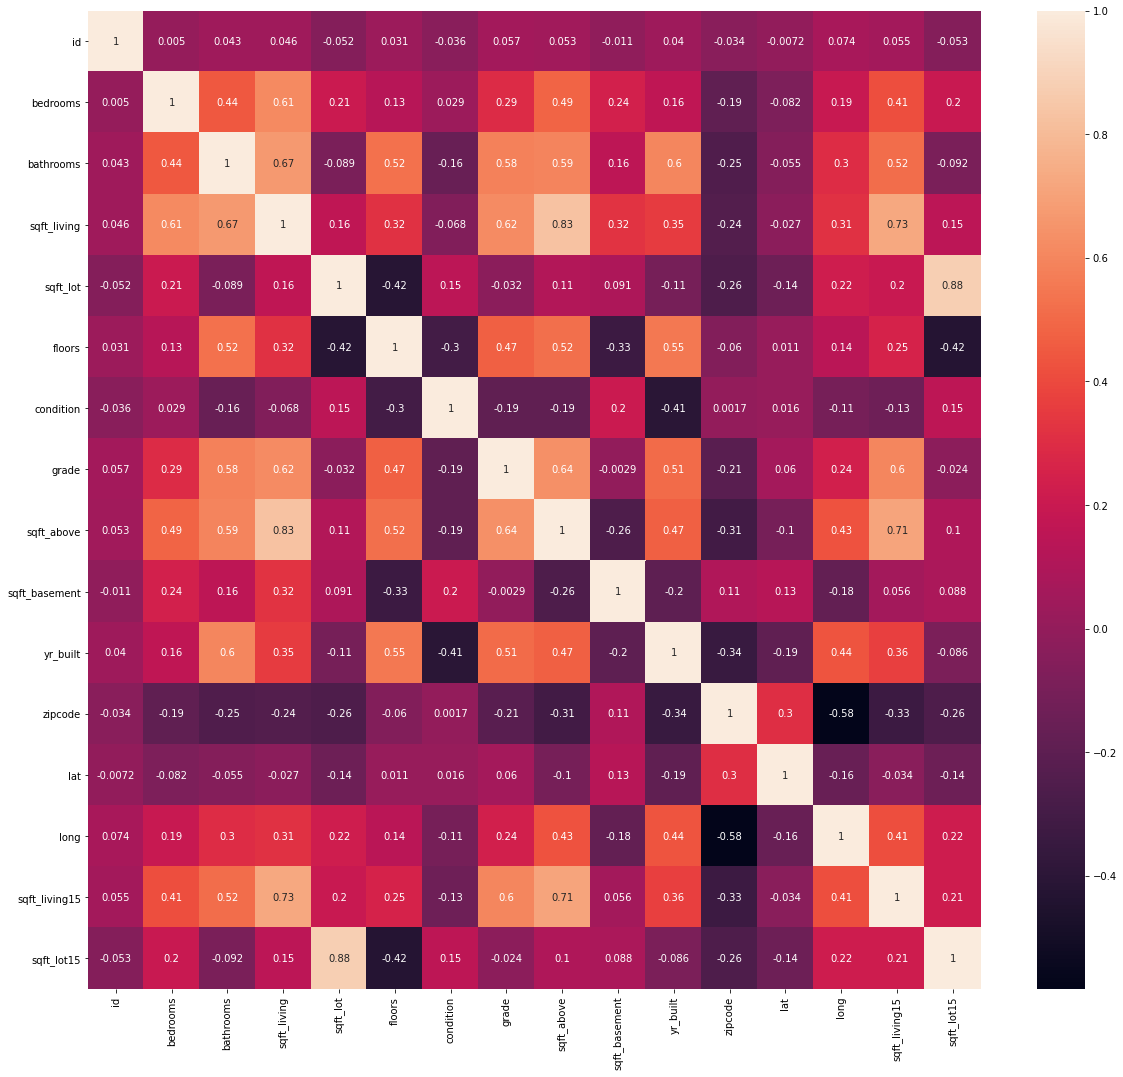

In [29]:
# drop columns with very little information and plot the correlation matrix of the remaining features
correlations = features_.drop(['waterfront', 'view', 'yr_renovated'], 1)
plt.figure(figsize = (20,18))
sns.heatmap(correlations.corr(), annot=True)

There are more variables which are correlated with each other and should be excluded from the model.

I will use their VIF scores which is the inverse of the correlation to detect multicolinearity. 

High VIF score exceeding 5 or 10 shows there is a high multicolinearity.

In [30]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = correlations.columns
    vif["VIF"] = [variance_inflation_factor(correlations.values, i) for i in range(correlations.shape[1])]

    return(vif)

In [31]:
# X = 
calc_vif(correlations)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,id,3.801298
1,bedrooms,1.720118
2,bathrooms,2.979209
3,sqft_living,inf
4,sqft_lot,4.688777
5,floors,2.754340
6,condition,1.255305
7,grade,2.338074
8,sqft_above,inf
9,sqft_basement,inf


In [32]:
# remove the features with infinite values
correlations = correlations.drop(['sqft_living', 'sqft_above', 'sqft_basement'], axis=1)
correlations.head()

,id,bedrooms,bathrooms,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,5650,1.0,3,7,1955,98178,47.5112,-122.257,1340,5650
2,5631500400,2,1.00,10000,1.0,3,6,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,5000,1.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,8080,1.0,3,8,1987,98074,47.6168,-122.045,1800,7503
6,1321400060,3,2.25,6819,2.0,3,7,1995,98003,47.3097,-122.327,2238,6819


In [33]:
# call the function once more to see the changes in the VIF
calc_vif(correlations)

,variables,VIF
0,id,3.800027
1,bedrooms,1.437331
2,bathrooms,2.467392
3,sqft_lot,4.624073
4,floors,2.122060
5,condition,1.251617
6,grade,2.169217
7,yr_built,2.298370
8,zipcode,0.608352
9,lat,1.183742


>The VIF scores reduce significantly while some improve. These are the features I will use to perform multivariate linear regression as they do not exhibit multicolinearity

In [34]:
features = ['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# selecting features and labels
X = correlations   #feature-set
y = data['price'] #labels

# scaling the features
X_scaled = pd.DataFrame(preprocessing.scale(X))
Y_scaled = preprocessing.scale(y)
X_scaled.columns = features

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [35]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.25, random_state = 0)

In [36]:
linear = LinearRegression()
# fit training sets onto the model
linear.fit(X_train, y_train)
# predict using the test sets
y_linear_predict = linear.predict(X_test)


**Evaluating the model**

In [37]:
# create a dataframe with the variables used in linear regression
linear_variables = correlations
linear_variables['price'] = data['price']
linear_variables.head()

,id,bedrooms,bathrooms,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,5650,1.0,3,7,1955,98178,47.5112,-122.257,1340,5650,221900.0
2,5631500400,2,1.00,10000,1.0,3,6,1933,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,4,3.00,5000,1.0,5,7,1965,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,3,2.00,8080,1.0,3,8,1987,98074,47.6168,-122.045,1800,7503,510000.0
6,1321400060,3,2.25,6819,2.0,3,7,1995,98003,47.3097,-122.327,2238,6819,257500.0


In [38]:
# compute the mean price of a house
linear_variables.price.mean()

438397.98935101466

In [39]:
# from sklearn import metrics
# # MSEs = pd.DataFrame()
# mse_linear = metrics.mean_squared_error(y_test, y_linear_predict)
# MSEs['MSE_linear'] = pd.Series(mse_linear)
# MSEs

In [40]:
print('Mean Absolute Error of linear model:', metrics.mean_absolute_error(y_test, y_linear_predict))
print('MSE_linear', metrics.mean_squared_error(y_test, y_linear_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_predict)))

Mean Absolute Error of linear model: 0.4631276561673827
MSE_linear 0.38509032333120485
Root Mean Squared Error: 0.6205564626455878


>The root mean squared error is quite high, comparing it with 10% of the mean value of the price.  The algorithm is not very accurate but can still make fair predictions. This may have been attributed by poor feature selection. The features used do not have a high enough correlation to the values being predicted as seen on the correlation heatmap on bivariate EDA.

>A feature like the square feet of the living area is not included in the model yet it was initially observed to be important. 

In [41]:

X_train.shape

(11198, 13)

In [42]:
# compute the r_squared and adjusted r_squared scores for the linear model
'''
# compute with formulas from the theory
yhat = linear.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)
'''

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
print (linear.score(X_test, y_test), 1 - (1-linear.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))

0.6220826474575929 0.6207616134207412


<font color = 'green'>Linear Predictions

In [43]:
linear_predictions = pd.DataFrame({'Actual': y_test, 'Linear_predicted': y_linear_predict})
linear_predictions.head(10)

,Actual,Linear_predicted
0,-0.157709,-0.563890
1,-0.740828,-0.919985
2,-0.029978,-0.311037
3,0.619784,-1.427649
4,-0.574222,-0.157739
5,1.280652,0.606496
6,0.397643,1.250959
7,-0.718614,-0.969922
8,1.730487,1.667008
9,-0.521464,-0.678928


<font color='green'>Residuals

In [44]:
# create the residual by substracting the test value from the predicted values
residuals = np.subtract(y_linear_predict, y_test)

# describe our residuals:
pd.DataFrame(residuals).describe()

,0
count,3733.000000
mean,-0.009468
std,0.620567
min,-3.170199
25%,-0.320353
50%,0.033332
75%,0.389221
max,1.931154


>The mean is close to 0, indicating that our model performed well, although slightly overestimating chances. This can be thoroughly investigated using the heteroskedasticity test


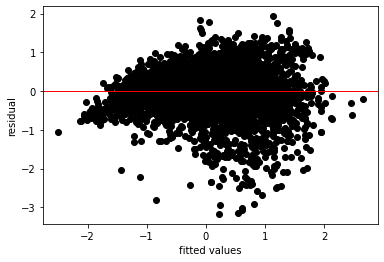

In [45]:
# plot the residuals against the predicted values
plt.scatter(y_linear_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

>The plot resembles a cone-shape which suggests that the data is heteroskedastic in nature. 

>This can be thoroughly investigated using the heteroskedasticity test.

<font color='green'>Heteroskedasticity test

In [46]:

test_result, p_value = sp.stats.bartlett(y_linear_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_linear_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!...There are no patterns to the variance of the data')

inf
the variances are homogeneous!...There are no patterns to the variance of the data


>This result is however not similar to the one from the plot.

>OLS regression assumes homoskedasticity, in which the variance of the residual term remains constant.

>This is however not the case as we can see from the plot of residuals that the data exhibits heteroskedasticity. Quantile regression is therefore suggested. 

In [63]:
lin = linear_variables.drop('price', axis=1)
lin.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition',
       'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [64]:
# find the coefficients of the linear regression model
coef_dict_baseline = {}
for coef, feat in zip(linear.coef_,lin.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.14935108278957493,
 'bedrooms': 0.03860275483862427,
 'condition': 0.10255185356018048,
 'floors': 0.05591668978071819,
 'grade': 0.3968660919545229,
 'id': 0.0036594335829860498,
 'lat': 0.4195987792366762,
 'long': 0.01228653030503174,
 'sqft_living15': 0.2590732713277454,
 'sqft_lot': -0.022159385655184244,
 'sqft_lot15': -0.0934727388384063,
 'yr_built': -0.3520568963022123,
 'zipcode': -0.06368620443896764}

# Challenging the solution

> The easy linear regression model solution is nice because it is, well, easy, but it does not work well with heteroskedastic data and multicolinear features. 

>The solution can also be implemented with other regression models such as: Quantile, Ridge, Lasso and Elastic net regression. 

>I will look at how these other models will perform with the same set of data.






## Quantile Regression(QR)

>Since the distribution of the target variable is heteroscedastic, it is recommended to use QR. This is because QR does not make assumptions on the distribution of the target variable.

>Since quantile regression is an extension of linear regression, it does not handle multicolinearity and hence I will use the same features used in linear regression to build the quantile regression model.

In [66]:
features = ['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# select features and labels
X = linear_variables.drop("price", 1)  #features
y = linear_variables['price'] #labels


# scaling the features and labels
X_scaled = pd.DataFrame(preprocessing.scale(X))
Y_scaled = preprocessing.scale(y) #labels are scaled for conviniency
X_scaled.columns = features




/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [67]:

# dividing the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=0)


In [68]:

quantiles = [0.25, 0.50, 0.75]
quant_reg = Q_reg.QuantReg(y_train, X_train)

# define a function to get the model and coefficients of the model
def Qreg(q):
  # i) modelling
  quantile = quant_reg.fit(q)
  
  # ii)get the coefficients and the lower and upper bounds
  coefs = pd.DataFrame()
  coefs['param'] = quantile.params
  coefs = pd.concat([coefs,quantile.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
  coefs['quantile'] = q
  coefs.columns = ['coef','beta_lower','beta_upper','quantile']

  return coefs


# create a new dataframe that will contain the QR coefficients
Qreg_coefs = pd.DataFrame()
for q in quantiles:
  # call the initial function created above
  coefs = Qreg(q)
  # concatenate the two dataframes
  Qreg_coefs = pd.concat([Qreg_coefs,coefs])


In [69]:
# coefficients of the model at quantile .25, .5, .75
Qreg_coefs

,coef,beta_lower,beta_upper,quantile
id,0.010094,-0.003021,0.023208,0.25
bedrooms,0.026715,0.011080,0.042350,0.25
bathrooms,0.145697,0.125447,0.165946,0.25
sqft_lot,-0.025113,-0.053372,0.003146,0.25
floors,0.064366,0.045565,0.083166,0.25
condition,0.090951,0.076048,0.105853,0.25
grade,0.369954,0.351099,0.388810,0.25
yr_built,-0.345840,-0.366472,-0.325207,0.25
zipcode,-0.051711,-0.069271,-0.034151,0.25
lat,0.409780,0.394184,0.425376,0.25


>Since linear regression models at the mean, it can be compared with quantile regression at the 50th percentile.

In [70]:
# coefficients of the model
coefs

,coef,beta_lower,beta_upper,quantile
id,0.012657,0.000458,0.024856,0.75
bedrooms,0.031630,0.017117,0.046143,0.75
bathrooms,0.145863,0.126751,0.164976,0.75
sqft_lot,-0.019677,-0.045662,0.006309,0.75
floors,0.065366,0.047725,0.083007,0.75
condition,0.084186,0.070570,0.097802,0.75
grade,0.361712,0.343551,0.379873,0.75
yr_built,-0.346565,-0.366470,-0.326659,0.75
zipcode,-0.052137,-0.067667,-0.036608,0.75
lat,0.416797,0.405255,0.428340,0.75


In [71]:
# predicting using the quantile regression model at different quantiles
y_quant25_predict = Q_reg.QuantReg(y_train, X_train).fit(0.25).predict(X_test)
y_quant50_predict  = Q_reg.QuantReg(y_train, X_train).fit(0.5).predict(X_test)
y_quant75_predict  = Q_reg.QuantReg(y_train, X_train).fit(0.75).predict(X_test)


**Evaluating the model**

In [72]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_lin_predict = linear_model.predict(X_test)

In [73]:
# compare the linear model and the quantile model
comparison = pd.DataFrame({'Actual': y_test,'Linear': y_lin_predict, '50th Quantile': y_quant50_predict,'25th Quantile':y_quant25_predict,'75th Quantile':y_quant75_predict})
comparison.describe()

,Actual,Linear,50th Quantile,25th Quantile,75th Quantile
count,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000
mean,-0.002593,-0.010690,-0.009920,-0.009479,-0.010286
std,1.003011,0.801368,0.773622,0.772947,0.774481
min,-1.934834,-2.504643,-2.393459,-2.383127,-2.402327
25%,-0.768737,-0.620424,-0.593471,-0.591431,-0.597429
50%,-0.179923,0.009563,0.016734,0.013376,0.017808
75%,0.602012,0.565519,0.537344,0.539004,0.539628
max,3.729753,2.661481,2.524515,2.525426,2.525355


In [74]:
# find the MSE of the quantile model at the 50th percentile
quantile_MSE = metrics.mean_squared_error(y_test, y_quant50_predict)
quantile_MSE

0.3777124611076775

In [75]:
# compute the r2_score for the model at the 50th percentile
r2 = metrics.r2_score(y_test,y_quant50_predict)
print('R2 score for the 50th percentile is {}'.format(r2) ) # 0.490744

R2 score for the 50th percentile is 0.6244261741649055


>The r^2 score and the MSE both improve significantly, showing that the quantile regression model performed better than the linear model.

## Ridge Regression

In [100]:
features = data.drop('price', 1)
features.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [114]:
# select the features and labels for ridge regression
X = data.drop('price', 1).values
y = data['price'].values

# scaling the features
X = pd.DataFrame(preprocessing.scale(X))
X.columns = features.columns
# dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [115]:

# create our ridge model and indicate normalization in order to get better estimates.
ridge = Ridge(normalize=True)

# set up the grid that we will use
ridge_search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# fit the train sets onto the model
ridge_search.fit(X_train,y_train)
print(ridge_search.best_params_)
{'alpha': 0.01}
abs(ridge_search.best_score_) 
#  The best_score_ tells us what the best possible mean squared error is. 

# The best_params_ tells us what to set alpha too which in this case is 0.001.

{'alpha': 0.001}


11214713126.802427

In [116]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)

y_ridge_predict = ridge_search.predict(X_test)


**Evaluating the ridge regression model**

In [117]:
print('Mean Absolute Error of ridge model:', metrics.mean_absolute_error(y_test, y_ridge_predict))
print('MSE_ridge', metrics.mean_squared_error(y_test, y_ridge_predict))
print('Root Mean Squared Error_Ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_ridge_predict)))

Mean Absolute Error of ridge model: 80121.49853660591
MSE_ridge 11376222381.18672
Root Mean Squared Error_Ridge: 106659.37549595309


In [118]:

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
print(ridge.score(X_test, y_test), 1 - (1-ridge.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))

0.6511263536746521 0.6488922453901285


>We can see that there is a slight improvement in our model because the value of the R-Square and adjusted r_squared has been increased. There is also an improvement in the mean squared error. 

>This means that our model now is able to predict much closer values to the actual values than our baseline(linear)model.

<font color='green'>Ridge Predictions

In [119]:
ridge_predictions = pd.DataFrame({'Actual': y_test, 'Ridge_predicted': y_ridge_predict})
ridge_predictions.head(10)

,Actual,Ridge_predicted
0,410000.0,341358.912591
1,305000.0,270408.627001
2,433000.0,399409.654985
3,550000.0,229078.149268
4,335000.0,417557.792440
5,669000.0,560250.288618
6,510000.0,692833.188030
7,309000.0,253972.188541
8,750000.0,735846.303965
9,344500.0,295906.224412


<font color='green'>Ridge coefficients

In [120]:
ridge_features = data.drop('price', axis=1)
ridge_features.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [121]:
# 
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,ridge_features.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# there is a huge difference in the coefficients of the linear model and the ridge regression model

{'bathrooms': 10792.623047433577,
 'bedrooms': -7448.460984202261,
 'condition': 17779.884438853638,
 'floors': 7912.885002779115,
 'grade': 60676.85880807354,
 'id': 922.5028202743155,
 'lat': 75965.18908833188,
 'long': -957.4357490845513,
 'sqft_above': 24067.099617045027,
 'sqft_basement': 12515.930278926455,
 'sqft_living': 30714.663471128162,
 'sqft_living15': 26796.582470469904,
 'sqft_lot': -9309.013258709067,
 'sqft_lot15': -15291.516620394086,
 'view': 0.0,
 'waterfront': 0.0,
 'yr_built': -57412.4716239467,
 'yr_renovated': 0.0,
 'zipcode': -15004.364042204905}

## Lasso Regression

In [122]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}


lasso = Lasso(normalize=True) 
grid_lasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
grid_lasso.fit(X_train, y_train) 

print(grid_lasso.best_params_)
{'alpha': 0.01}
abs(grid_lasso.best_score_)

# the best score is a little bit higher than that of the ridge regression model

{'alpha': 0.1}


0.6533779148334171

In [123]:
# We can confirm this by fitting our model with the lasso information and finding the mean squared error below
lasso = Lasso(normalize= True, alpha=0.1)
lasso.fit(X_train,y_train)

# predicting
y_lasso_predict = lasso.predict(X_test)


In [124]:
# MSE for lasso model
lasso_MSE = mean_squared_error(y_test, y_lasso_predict)
lasso_MSE

11375693739.584713

In [125]:
# compute the r^2 score for the lasso model

lasso_r2 = r2_score(y_test, y_lasso_predict)
lasso_r2

0.6511425654817978

In [ ]:
# compute lasso model adjusted-r-square directly
lasso_adjusted_r2 = 1 - (1-lasso.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
lasso_adjusted_r2

0.6489085610140373

>We can see that there is a slight improvement in our model because the value of the R-Square and adjusted r_squared has been increased. There is also an improvement in the mean squared error. 

>This means that our model now is able to predict much closer values to the actual values than our baseline(linear) and ridge models. We can check to see the predictions

<font color = 'green'>Lasso Predictions

In [126]:
lasso_predictions = pd.DataFrame({'Actual': y_test, 'Ridge_predictions': y_ridge_predict, 'Lasso_predictions': y_lasso_predict})
lasso_predictions.sample(10)

,Actual,Ridge_predictions,Lasso_predictions
2208,230000.0,267771.012004,267543.788100
2473,260000.0,295386.475723,295438.933772
418,231500.0,291512.058302,291433.414240
30,279000.0,262885.283236,262643.378628
316,525000.0,524121.890875,524121.421601
387,271310.0,317076.888698,317223.499893
1615,242000.0,348068.011691,347985.149966
960,378000.0,496347.952095,496259.499032
2568,470950.0,583675.937788,583883.877651
1604,269000.0,366529.129553,366637.278531


>Lasso predictions are much better than the ridge predictions though not quite accurate either.

>We can also look at the coeffients of the lasso model

In [127]:
coeff1 = pd.DataFrame()
coeff1['features'] = pd.Series(ridge_features.columns)
coeff1['coefficient Estimate_Lasso'] = pd.Series(grid_lasso.best_estimator_.coef_)
coeff1['Ridge coefficients'] = pd.Series(ridge.coef_)
coeff1
coeff1['Linear coefficients'] = pd.Series(linear.coef_)
coeff1

,features,coefficient Estimate_Lasso,Ridge coefficients,Linear coefficients
0,id,906.408690,922.502820,0.003659
1,bedrooms,-7475.423515,-7448.460984,0.038603
2,bathrooms,10770.030784,10792.623047,0.149351
3,sqft_living,63095.505237,30714.663471,-0.022159
4,sqft_lot,-9282.941668,-9309.013259,0.055917
5,floors,7924.586582,7912.885003,0.102552
6,waterfront,0.000000,0.000000,0.396866
7,view,0.000000,0.000000,-0.352057
8,condition,17758.767233,17779.884439,-0.063686
9,grade,60795.141997,60676.858808,0.419599


>The lasso model penalizes the coefficients strictly and by a huge amount compared to the ridge and linear models.

## Elastic Net Regression

In [128]:
# I will use the same features here as in ridge and lasso regression

elastic=ElasticNet(normalize=True)
# create our grid
elastic_search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8), 'l1_ratio':[.2,.4,.6,.8]},
                          scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [129]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
elastic_search.fit(X_train,y_train)
print(f"The best hyperparameters: {elastic_search.best_params_}")
print(f"The best score: {abs(elastic_search.best_score_)}")

The best hyperparameters: {'alpha': 1e-05, 'l1_ratio': 0.8}
The best score: 11222187638.65385


In [130]:
# The best hyperparameters was an alpha set to 1e-05 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 11222187638.65385. This is below the MSE of the baseline, ridge and lasso models. 
# Which means that elastic net is doing better than the other models. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X_train,y_train)

# predicting using our elastic net model
y_elastic_predict = elastic.predict(X_test)

In [131]:
# MSE for lasso model
elastic_MSE = mean_squared_error(y_test, y_elastic_predict)
elastic_MSE

11387737465.312529

>The MSE of the Elastic-Net is a little bit higher than those of the ridge and lasso models. 

>Does this mean that it performs poorly than than the ridge and lasso models?

In [132]:
# compute the r^2 score for the elastic-net model
elastic_r2 = r2_score(y_test, y_elastic_predict)
elastic_r2

0.6507732215669888

In [133]:
# compute elastic-net model adjusted-r-square directly
elastic_adjusted_r2 = 1 - (1-elastic.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
elastic_adjusted_r2

0.6485368519039529

>The r^2 score and the adjusted r^2 scores improve compared to those of the baseline model, ridge and lasso models. 

>This means that the elastic model performs better than the others 

<font color='green'>Elastic Net Predictions

In [134]:
elastic_predictions = pd.DataFrame({'Actual': y_test, 'Elastic_predictions': y_elastic_predict, 'Lasso_predictions': y_lasso_predict, 'Ridge_predictions': y_ridge_predict,})
elastic_predictions.sample(10)

,Actual,Elastic_predictions,Lasso_predictions,Ridge_predictions
2859,236000.0,219513.588701,217880.125503,217990.442252
1700,360000.0,304560.084148,302507.405156,302561.445372
1053,417400.0,564798.779347,567256.884225,567235.876467
2901,1030000.0,752897.116911,758364.746440,758126.327339
1760,279000.0,354933.792302,355545.073310,355504.957349
629,760369.0,637222.214889,638113.118702,638086.133139
1792,430000.0,439876.439071,441335.047113,441234.841431
1255,225000.0,233030.529044,231192.427959,231209.381411
2965,379900.0,325575.621044,325854.128448,325930.934939
2877,300000.0,366208.030912,360987.033653,361207.896443


In [135]:
# include another column with the elastic net coefficients into the coefficients dataframe
coeff1['Elastic coefficients'] = pd.Series(elastic.coef_)
coeff1

,features,coefficient Estimate_Lasso,Ridge coefficients,Linear coefficients,Elastic coefficients
0,id,906.408690,922.502820,0.003659,1028.725200
1,bedrooms,-7475.423515,-7448.460984,0.038603,-6689.555464
2,bathrooms,10770.030784,10792.623047,0.149351,10145.230373
3,sqft_living,63095.505237,30714.663471,-0.022159,30540.208100
4,sqft_lot,-9282.941668,-9309.013259,0.055917,-9390.230960
5,floors,7924.586582,7912.885003,0.102552,7717.880110
6,waterfront,0.000000,0.000000,0.396866,0.000000
7,view,0.000000,0.000000,-0.352057,0.000000
8,condition,17758.767233,17779.884439,-0.063686,17943.509302
9,grade,60795.141997,60676.858808,0.419599,58480.553541


>We can see the coefficients of the elastic net regression are not heavily penalized as in the lasso. It introduces a penalty on regression coefficients which is a convex combination of lasso and ridge penalty. 

This type of regression combines the power of ridge and lasso regression into one algorithm. What this means is that with elastic net the algorithm can remove weak variables altogether as with lasso or to reduce them to close to zero as with ridge.

>The Elastic-Net regression model looks promising compared to the baseline model and the ridge, lasso and quantile models. This is because it gave predictions much closer to the actual prices of a house but not as accurate. 

This can be further investigated by cross-validating it and also passing unseen data to the model while checking its performance. 
 






# Follow up questions

## a). Did we have the right data?

>Yes, the data available was appropriate for the research question that was stated. 

## b). Do we need other data to answer our question?

>It would be desirable if more variables were added. This would improve the predictive power of our model especially if some factors such as the type of house(apartment, bungalow, country-house, studio apartment)etc is included.

## c). Did we have the right question?

>The research question was specific and appropriate and in line with our needs and the data available